In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [2]:
class MyLinearRegression():
    """ 
    Linear Regression via gradient descent
    
    """

    def __init__(self, num_iter = 10000, h = 0.001):
        self.num_iter = num_iter
        self.h = h
        self.parameters = []

    def init_parameters(self, X):

        """ 
        Initialize Parameters
        _________________________

        Inputs
        X: training data inputs
        ________________________
        Returns
        Updated array of 0's with length = num of params for starting model fit
        
        """

        # get input data dimensions
        numrows, numcols = X.shape
        # intialize parameters as 0's
        self.parameters = np.zeros(numcols + 1)
        self.parameters = self.parameters.reshape(self.parameters.size, 1)
        return self

    def grad_descent(self, X, y):
        """ 
        Gradient Descent of Mean Squared Error
        ______________________________________
        Inputs
        X: Training data inputs
        y: Training data labels
        _______________________
        Returns
        Optimized parameters based on gradient descent

        """

        ### we just want to pass in our inputs X and without having to think about inserting the column of 1's
        ### so we do that here first
        newX = X.assign(CONST = 1)
        w = self.parameters
        ### extract the num of rows for our "n" value in the gradient
        n, cols = X.shape
        

        for i in range(self.num_iter):
            # first calculate predicted values
            y_p = np.dot(newX, w)
            
            # compute the gradient of the loss function L(w)
            dLdw = (2/n) * np.dot(newX.T, (y_p - y))
            # update coefficients 
            w = (w - self.h*dLdw)

        # send back final parameters
        self.parameters = w

        return self

    def train(self, X, y):
        """ 
        Train the linear regression model via gradient descent
        ___________
        Inputs
        X: Training data inputs
        y: Training data labels
        _______________________
        Returns
        Optimized parameters based on gradient descent
        """

        self.init_parameters(X)
        self.grad_descent(X, y)

        return self

    def print_coefficients(self):
        """
        prints coefficients after model training
        """

        wvector = self.parameters
        for i in range(len(wvector)):
            if i != len(wvector) -1 :
                print('Coefficients: w_%s : %f' %(i+1,wvector[i]))
            else:
                print('Intercept: w_0 : %f' % wvector[-1])

    def predict(self, X_test):
        """ 
        Uses current state of parameters for predictions
        ___________
        Inputs
        X_test: test data

        Returns:
        Predictions from model
        """

        newXtest = X_test.assign(CONST = 1)
        w = self.parameters

        predicted_values = np.dot(newXtest, w)

        return predicted_values

        

In [3]:
## set seed for reproducible results
rng = np.random.default_rng(seed = 42)
# Creates 500 random numbers from a uniform distirbution (0,1), multiply by 20 to scale
X = 20*rng.random(500)

# Create 500 y values from x with some "jitter" based on STD Normal Distribution, scaled by 10
y = X + 2*rng.standard_normal(500)

In [58]:
data = {'X1': X, 'y' : y}
df = pd.DataFrame(data)


In [59]:
# typically, you'd do some EDA to look for potential features for prediction
# from above, clearly X1 is a useful feature, we seperate the inputs and target
inputsX = df[['X1']]
targetY = df[['y']]

# split training and test data to protect against overfitting
# could hardcode this but we'll just use SKL's built in for convience
X_train, X_test, y_train, y_test = train_test_split(inputsX, targetY, test_size=0.25, random_state=42)

In [60]:
model = MyLinearRegression()
model.train(X_train, y_train)

In [61]:
model.print_coefficients()

Coefficients: w_1 : 0.992206
Intercept: w_0 : -0.060669


In [63]:
pred_values = model.predict(X_test)

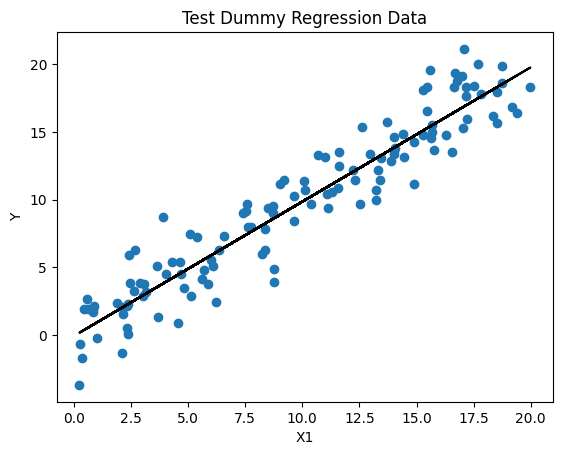

In [64]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred_values, color = 'black')
plt.title("Test Dummy Regression Data")
plt.xlabel("X1")
plt.ylabel("Y")

plt.show()

### but does it work with two or more features as inputs?!?!?

In [4]:
X = 5*rng.random(500)

X2 = X*X

# Create 500 y values from x with some "jitter" based on STD Normal Distribution, scaled by 10
y = X + 2*rng.standard_normal(500) + 0.015*X**2

In [5]:
d = {'X1': X, 'X2' : X2, 'y' : y}
da = pd.DataFrame(d)
da.head()

,X1,X2,y
0,1.713568,2.936316,1.376092
1,0.886178,0.785311,0.572359
2,3.390470,11.495289,7.754897
3,4.230038,17.893220,1.584160
4,0.201269,0.040509,-0.579479


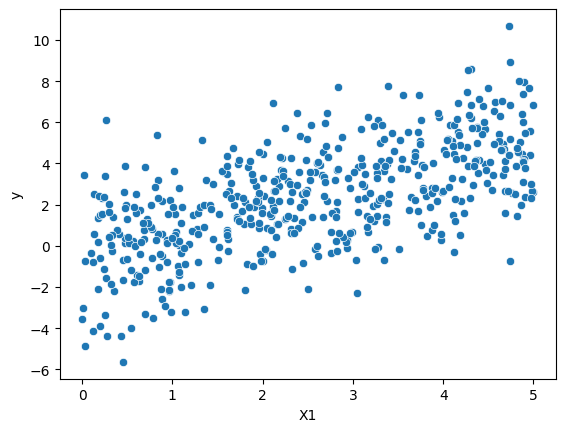

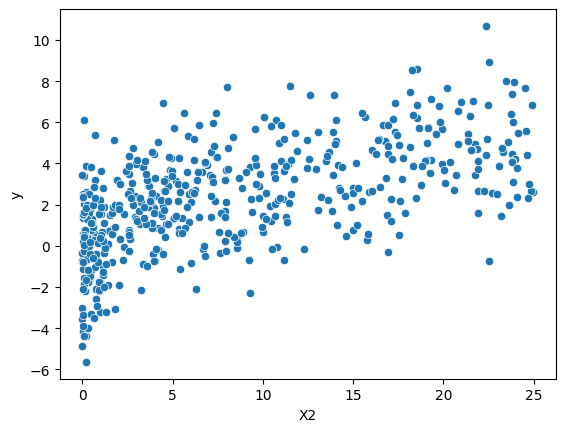

In [6]:
import seaborn as sns
sns.scatterplot(data = da, x = 'X1', y = 'y')
plt.show()
sns.scatterplot(data = da, x = 'X2', y = 'y')
plt.show()

In [7]:
inputsX = da[['X1', 'X2']]
targetY = da[['y']]

X_train, X_test, y_train, y_test = train_test_split(inputsX, targetY, test_size=0.25, random_state=42)


In [8]:
model = MyLinearRegression(num_iter = 75000)
model.train(X_train, y_train)

In [9]:
model.print_coefficients()

Coefficients: w_1 : 1.243168
Coefficients: w_2 : -0.031099
Intercept: w_0 : -0.552557


In [10]:
#### compare against sklearn calculation
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[ 1.24321693 -0.03110789]]
[-0.552611]
